In [3]:
import pandas as pd

## 1. Where did the dataset come from?


In [ ]:
# Swiss administration
# http://www.valeursnutritives.ch/request?xml=MessageData&xml=MetaData&xsl=Download&lan=en&pageKey=Start

# The Swiss Food Composition Database is a data collection of the Federal Food Safety and Veterinary Office 
# FSVO on the composition of foods that are available in Switzerland.
# The data collection can be consulted on this website free of charge by all interested parties.
# All data may be used for both commercial and scientific purposes by acknowledging the source.

## 2. If I had questions about this dataset, who would I ask?

In [ ]:
# There is a contact link on the web page that provides the dataset
# http://www.valeursnutritives.ch/request?contact=mail&xml=MessageData&xml=MetaData&xsl=Contact&lan=en&name=&mail=&organisation=&message=&status=call

## 3. Open the dataset using pandas.

In [21]:
df = pd.read_excel('swiss_food.xlsx', skiprows=2, sheetname='Branded Foods')

## 4. How many columns and rows does it have?

In [23]:
df.shape

(9618, 202)

## 5. What are the data types of each column?

In [19]:
df.dtypes

ID                      int64
ID V 4.0              float64
ID SwissFIR           float64
name D                 object
synonyms D             object
name F                 object
synonyms F             object
name I                 object
synonyms I             object
name E                 object
synonyms E             object
category D             object
category F             object
category I             object
category E             object
specific gravity      float64
energy kJ               int64
unit                   object
matrix unit            object
value type             object
source                 object
energy kcal             int64
unit.1                 object
matrix unit.1          object
value type.1           object
source.1               object
protein               float64
unit.2                 object
matrix unit.2          object
value type.2           object
                       ...   
unit.31                object
matrix unit.31         object
value type

## 6. Tell me what four of the columns mean, and state whether you made up the definitions or used a data dictionary.

In [ ]:
# I didn't find any data dictionary

# 1. name E
# Name of the food in english

# 2. category E
# Type of the food

# 3. protein
# Quantity of proetins per 100g

# 4. value type
# How the value of the nutriment has been acquired

## 7. Write five questions you could ask the data. A simple way to ask decent questions is comparing a measurement across two subgroups. For example, "how do points scored in basketball in the 1950's compare to the 1990's," "how often do women punch walls vs. men punch walls?"

In [35]:
# 1. What is the nutritive difference between culture-branded foods
# 2. What is the distribution of sugars among yogourts
# 3. What is the product with the highest level of alcohol
# 4. What is the darkest chocolate
# 5. Are the expensive prepared dishes healthier thant the cheapest ones?

## 8. Try to ask the data those five questions.

In [51]:
# 1. Are the italian branded foods really less fatty and salty than the asian ones?

(df[
    (df['category E'] == 'Prepared dishes/Asian dishes') | 
    (df['category E'] == 'Prepared dishes/Italian dishes') |
    (df['category E'] == 'Prepared dishes/Other savoury dishes')]
 .groupby('category E')['fat, total'].mean())

category E
Prepared dishes/Asian dishes            6.049587
Prepared dishes/Italian dishes          6.187761
Prepared dishes/Other savoury dishes    7.668519
Name: fat, total, dtype: float64

In [52]:
(df[
    (df['category E'] == 'Prepared dishes/Asian dishes') | 
    (df['category E'] == 'Prepared dishes/Italian dishes') |
    (df['category E'] == 'Prepared dishes/Other savoury dishes')]
 .groupby('category E')['sodium (Na)'].mean())

category E
Prepared dishes/Asian dishes            468.793103
Prepared dishes/Italian dishes          509.292169
Prepared dishes/Other savoury dishes    511.046693
Name: sodium (Na), dtype: float64

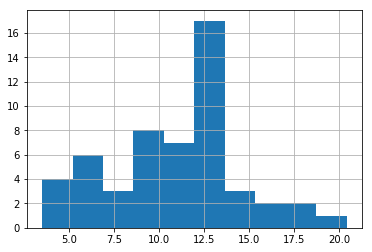

In [87]:
# 2. What is the distribution of sugars among yogourts
%matplotlib inline
(df[
    (df['category E'] == 'Milk and dairy products/Milk and yoghurt beverages')]['sugars'].hist(bins=10))

In [88]:
# 3. What is the alcoholic beverage with the highest percentage of alcohol
df.nlargest(3, 'alcohol')[['name E', 'alcohol']]

,name E,alcohol
6582,Pastis 51 de Marseille (45 vol%),35.5
11,Aberlour 10 years old Malt Scotch Whisky (43 v...,34.0
3144,Four Roses Bourbon (40 vol%),31.7


In [89]:
# 4. What is the darkest chocolate
df[df['category E'] == 'Sweets/Chocolate and cocoa products'].nsmallest(3, 'sugars')['name E']

9494       Weight Watchers Tablet chocolate Crispy (Coop)
9495         Weight Watchers Tablet chocolate Milk (Coop)
7667    Qualité&Prix Max Havelaar Tablet chocolate Dar...
Name: name E, dtype: object

In [ ]:
# 5. Compare three different sets of prepared dishes

In [142]:
# Nestle
(df[
    (df['name E'].str.contains('Nestlé', case=False)) & 
    (df['category E'].str.contains('Prepared dishes'))][['fat, total', 'sugars']].mean())

fat, total    9.240000
sugars        4.159302
dtype: float64

In [143]:
# Cheapests
(df[
    (df['name E'].str.contains('m-budget', case=False)) & 
    (df['category E'].str.contains('Prepared dishes'))][['fat, total', 'sugars']].mean())

fat, total    6.446429
sugars        2.282143
dtype: float64

In [147]:
# 6. What does Nestle sell?
df[df['name E'].str.contains('Nestlé', case=False)]['category E'].value_counts()

Sweets/Chocolate and cocoa products                                                           73
Sweets/Milk based ice cream                                                                   58
Various/Salt, spices and flavours                                                             44
Various/Sauces                                                                                33
Prepared dishes/Italian dishes                                                                32
Prepared dishes/Other savoury dishes                                                          25
Non-alcoholic beverages/Coffee                                                                23
Prepared dishes/Stews and soups                                                               22
Vegetables/Frozen vegetables                                                                  18
Fats and oils/Salad dressings                                                                 17
Non-alcoholic beverages/Coffee

## 9. If you have problems reading the data in or asking the questions, keep a lot of notes about that. I hope you all run into a hundred problems, then we can solve them next week.